In [1]:
import pandas as pd
import cufflinks as cf
import plotly.graph_objects as go
import math
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
import numpy as np
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [2]:
data = px.data.gapminder()


In [3]:
data.head(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
fig = px.scatter(data[data["year"] == 2007],  x="gdpPercap", y="lifeExp", color = "continent", size = "pop", size_max=60, hover_name='country')

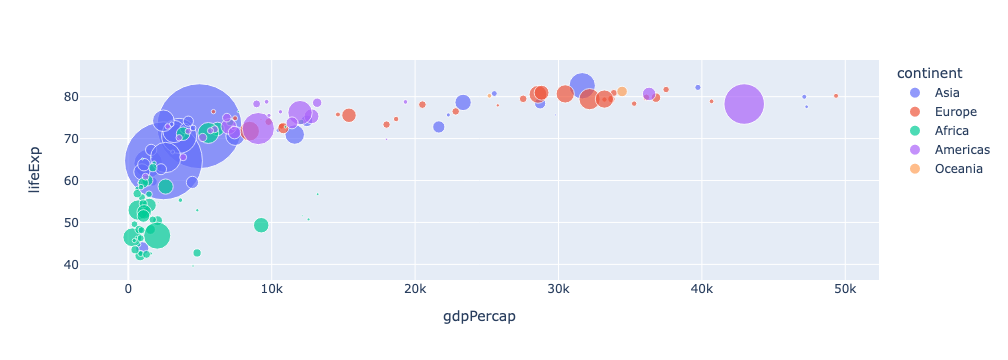

In [5]:
fig

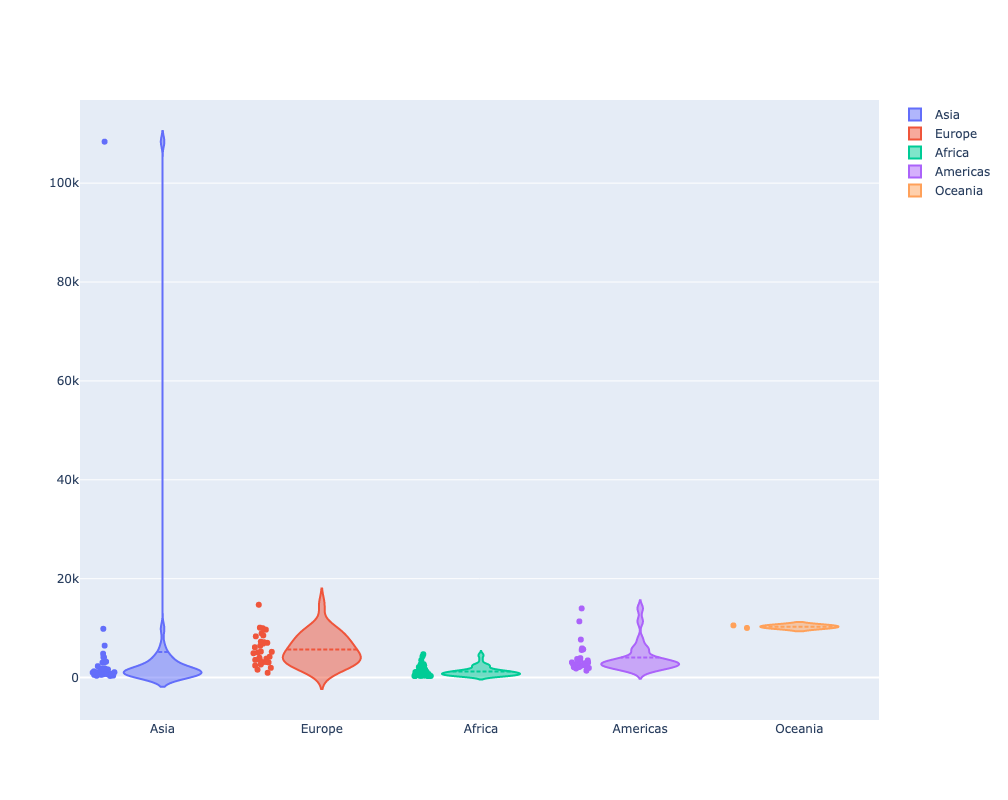

In [6]:
customdata = np.array(data['country'])
hovertemplate = ( 
    'Country: %{customdata}<br>' + 
    'gdpPercap: %{y:,.4f} <br>' +  
    '<extra></extra>')




fig = go.Figure()
con_list = data['continent'].unique().tolist()

years = data['year'].unique()
for index, year in enumerate(years):
    data_ = data[data['year'] == year]
    for item in con_list:
        fig.add_traces(go.Violin(x=data_[data_['continent']==item]['continent'],
                        visible=False,
                        y=data_[data_['continent'] == item]['gdpPercap'],
                        meanline_visible=True, name=item,points='all',hoveron='points', customdata=np.array(data_[data_['continent'] == item]['country']),hovertemplate=hovertemplate))

for i in range(5):
    fig.data[i].visible=True
fig.update_layout(
    autosize=False,
    width=1200,
    height=800)



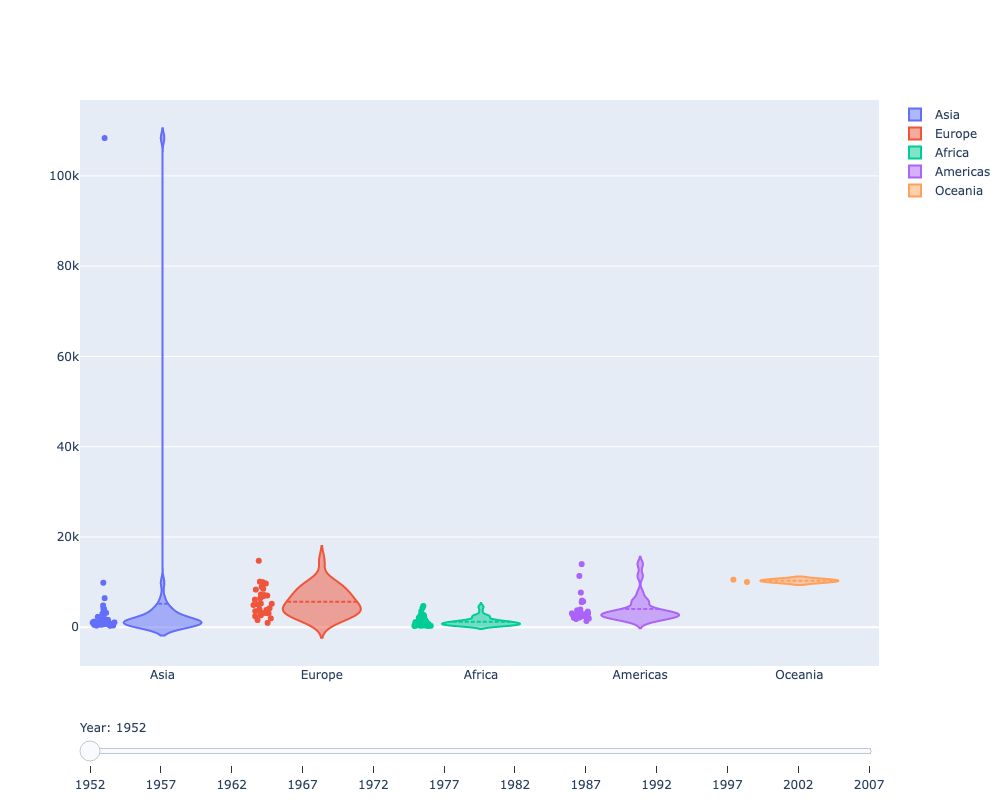

In [7]:
years = data['year'].unique()
steps = []
for i in range(int(len(fig.data)/5)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}, #create an array of bool value. 60 traces ==> 60 binary values
              {"title": "GDP Per Capital in the year: " + str(years[i])}],
        label = str(years[i]) # layout attribute
    )
    for j in range(5):
        step["args"][0]["visible"][i*5+j] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [8]:
len(fig.data)

60

In [9]:
str(data['year'].unique()[0])

'1952'

# Data pre-processing

In [10]:
wdf = pd.read_csv("data/world_ind.csv")
indicaters = wdf['Series Code'].unique() # grabbing code for each type of data
indicaters

array(['SP.DYN.LE00.IN', 'EN.ATM.CO2E.KT', 'SP.POP.TOTL',
       'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.CD', nan], dtype=object)

List of inlcuded indicators and their code:
- Life expectancy: "SP.DYN.LE00.IN"
- CO2 emission (kilo-ton): "EN.ATM.CO2E.KT"
- Population: SP.POP.TOTL
- GDP per capita: 'NY.GDP.PCAP.CD'
- GDP: 'NY.GDP.MKTP.CD'

In [11]:
wdf = wdf.dropna()

In [12]:
wdf.head(5)

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.461,39.003,39.558,40.128,40.715,41.32,...,62.054,62.525,62.966,63.377,63.763,64.13,64.486,64.833,65.173,..
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,..,..,..,..,..,..,...,8079.99992370605,5989.99977111816,4880.00011444092,5949.99980926514,5300.00019073486,4780.00020980835,6070.00017166138,6079.99992370605,..,..
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11791222,12108963,12412960,12689164,12943093,13171294,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,135.317227981591,143.144649500081,173.653624742026,186.510838346447,197.445507551145,224.225001566116,...,638.845851607289,624.315454506615,614.223342360392,556.007220861443,512.012778129357,516.679862210543,485.668418729808,494.179349886029,516.747870807558,..
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1595555475.55556,1733333264.44444,2155555497.77778,2366666615.55556,2555555566.66667,2953333417.77778,...,19907317065.6666,20146404996.223,20497126770.1335,19134211763.859,18116562464.9088,18753469630.2586,18053228578.8878,18799450742.7823,20116137325.8206,..


## "Melting" the years
Here we see each year has their own column, which we need to 'melt' back together into 1 single column. Below are the results

In [13]:
data = pd.melt(wdf, id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name= "year", value_name = "value")

In [14]:
data

,Country Name,Country Code,Series Name,Series Code,year,value
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1972 [YR1972],38.461
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,1972 [YR1972],..
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1972 [YR1972],11791222
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1972 [YR1972],135.317227981591
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1972 [YR1972],1595555475.55556
...,...,...,...,...,...,...
54245,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2021 [YR2021],..
54246,Zimbabwe,ZWE,CO2 emissions (kt),EN.ATM.CO2E.KT,2021 [YR2021],..
54247,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2021 [YR2021],15092171
54248,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2021 [YR2021],1737.17397698043


## "Unmelting" the indicators
We now need to do the opposite for indicators. Showing a 5 columns of:
- "GDP", 
- "Population",
- "CO2", 
- "GDP per capita", 
- "Life expectency" ...

... is more intuitive than the data's current form.

In [15]:
data = data.drop(["Series Code"], axis=1) # dropping Series Code

In [16]:
data = data.dropna().pivot(values = ["value"], index = ['Country Name', 'Country Code', 'year'], columns = ['Series Name'])

In [17]:
data = data.reset_index()

In [18]:
data.columns = data.columns.to_flat_index()


In [19]:
data.columns = ["Country", "Country Code", "Year", "CO2 emissions", "GDP", "GDP per capita", "Life Expectency", "Population"]
data

,Country,Country Code,Year,CO2 emissions,GDP,GDP per capita,Life Expectency,Population
0,Afghanistan,AFG,1972 [YR1972],..,1595555475.55556,135.317227981591,38.461,11791222
1,Afghanistan,AFG,1973 [YR1973],..,1733333264.44444,143.144649500081,39.003,12108963
2,Afghanistan,AFG,1974 [YR1974],..,2155555497.77778,173.653624742026,39.558,12412960
3,Afghanistan,AFG,1975 [YR1975],..,2366666615.55556,186.510838346447,40.128,12689164
4,Afghanistan,AFG,1976 [YR1976],..,2555555566.66667,197.445507551145,40.715,12943093
...,...,...,...,...,...,...,...,...
10845,Zimbabwe,ZWE,2017 [YR2017],10340.0001525879,17584890936.6523,1235.18903192064,60.812,14236599
10846,Zimbabwe,ZWE,2018 [YR2018],12380.0001144409,18115543790.7855,1254.64226494434,61.195,14438812
10847,Zimbabwe,ZWE,2019 [YR2019],11760.0002288818,19284289739.0517,1316.74065692871,61.49,14645473
10848,Zimbabwe,ZWE,2020 [YR2020],..,18051170798.941,1214.50982023534,61.738,14862927


#### minor fix to the year column
And lastly, we adjust the **"Year"** column to correct its form.

In [22]:
data['Year'] = data['Year'].apply(lambda x: int(x[0:4]))
data

,Country,Country Code,Year,CO2 emissions,GDP,GDP per capita,Life Expectency,Population
0,Afghanistan,AFG,1972,..,1595555475.55556,135.317227981591,38.461,11791222
1,Afghanistan,AFG,1973,..,1733333264.44444,143.144649500081,39.003,12108963
2,Afghanistan,AFG,1974,..,2155555497.77778,173.653624742026,39.558,12412960
3,Afghanistan,AFG,1975,..,2366666615.55556,186.510838346447,40.128,12689164
4,Afghanistan,AFG,1976,..,2555555566.66667,197.445507551145,40.715,12943093
...,...,...,...,...,...,...,...,...
10845,Zimbabwe,ZWE,2017,10340.0001525879,17584890936.6523,1235.18903192064,60.812,14236599
10846,Zimbabwe,ZWE,2018,12380.0001144409,18115543790.7855,1254.64226494434,61.195,14438812
10847,Zimbabwe,ZWE,2019,11760.0002288818,19284289739.0517,1316.74065692871,61.49,14645473
10848,Zimbabwe,ZWE,2020,..,18051170798.941,1214.50982023534,61.738,14862927


In [23]:
data.to_csv("World Data.csv")